In [1]:
import numpy as np
import pandas as pd
import re
import glob

#to test with other folders, change this 
root_testing_folder = "REPORT_RUNS/"

In [2]:
def file_paths(dataset_directory):
    paths = []
    for x in glob.iglob(dataset_directory + "*.txt"):
        paths.append(x)
    return paths


def file_properties(path):
    list_of_matches = re.findall("out_(\d+)_(\d+)_(\d+)_(\d+).txt", path)
    arr = list_of_matches.pop()
    return int(arr[0]), int(arr[1]), int(arr[2]), int(arr[3])


def file_reader(str):
    list_of_matches = re.findall("(........) seconds", str)
    arr = list_of_matches.pop()
    return float(arr)


def bandwidth_calculation(row):
    if (row["dtype"] == 2):
        d_dim = 8
    else:
        d_dim = 4

    return (2**row["pow"]*2**row["pow"])*2*d_dim/(row["seconds"]*10**9)

In [3]:
def get_dataframe(data_path):
    paths = file_paths(data_path)
    properties_list = []
    for path in paths:
        with open(path) as file:
            pow, iter, dtype, optimization = file_properties(path)
            str = file.read()
            seconds = file_reader(str)
            properties_list.append([pow, iter, dtype, optimization, seconds])
    df = pd.DataFrame(properties_list, columns=[
                      "pow", "iteration", "dtype", "optimization", "seconds"])
    # (2**(pow+1))*2/pow_list[2]
    df["bandwidth"] = df.apply(bandwidth_calculation, axis=1)

    return df

In [4]:

def get_data_values(dataframe,column):
    max_pow = int(dataframe['pow'].max())
    element = []
    pow_list=range(1,max_pow+1)
    type_list= range(0,3)
    optimization_list = range(0,4)
    for o in optimization_list:
        element.append([])
        for dt in type_list:
            element[o].append([])
            element[o][dt].append([])
            element[o][dt].append([])
            element[o][dt].append([])
            
            for x in pow_list:
                max_y = dataframe.query(f'pow == {x} and dtype=={dt} and optimization=={o}')[column].max()
                element[o][dt][0].append(max_y)
                min_y = dataframe.query(f'pow == {x} and dtype=={dt} and optimization=={o}')[column].min()
                element[o][dt][1].append(min_y)
                element[o][dt][2].append((max_y+min_y)/2)

    return pow_list, type_list, max_pow, element

In [5]:
import matplotlib.pyplot as plt

def print_plots(pow_list, type_list, list_of_y, alpha=.2,measuring="",title = "####################"):
    fig, axs = plt.subplots(2,2)
    colors = ["blue","red","magenta","green"]
    type_strings = ["integer","float","double"]
    max_value = (max(list(map(max,map(max,map(max, list_of_y))))))
    print(max_value)
    for x in type_list:
        axs[0, 0].fill_between(pow_list,list_of_y[0][x][0], list_of_y[0][x][1],  alpha=alpha, linewidth=0,color=colors[x])
        axs[0, 0].plot(pow_list, list_of_y[0][x][2], linewidth=1,color=colors[x],label = type_strings[x])
        axs[0,0].set_xticks(pow_list,[])
        axs[0,0].set_ylim([0,max_value])
        axs[0,0].legend()

        axs[0, 1].fill_between(pow_list,list_of_y[1][x][0], list_of_y[0][x][1],  alpha=alpha, linewidth=0,color=colors[x])
        axs[0, 1].plot(pow_list, list_of_y[1][x][2], linewidth=1,color=colors[x],label = type_strings[x])
        axs[0,1].set_ylim([0,max_value])

        axs[0,1].set_xticks(pow_list,[])

        axs[1, 0].fill_between(pow_list,list_of_y[2][x][0], list_of_y[0][x][1],  alpha=alpha, linewidth=0,color=colors[x])
        axs[1, 0].plot(pow_list, list_of_y[2][x][2], linewidth=1,color=colors[x],label = type_strings[x])
        axs[1, 0].set_xticks(pow_list,pow_list,rotation=270)
        axs[1,0].set_ylim([0,max_value])


        axs[1, 1].fill_between(pow_list,list_of_y[3][x][0], list_of_y[0][x][1],  alpha=alpha, linewidth=0,color=colors[x])
        axs[1, 1].plot(pow_list, list_of_y[3][x][2], linewidth=1,color=colors[x],label = type_strings[x])
        axs[1,1].set_ylim([0,max_value])

        axs[1, 1].set_xticks(pow_list, pow_list,rotation=270)
        
    axs[0, 0].set_title('No optimization')
    axs[0, 1].set_title('-01')
    axs[1, 0].set_title('-02')
    axs[1, 1].set_title('-03')
    axs[0, 0].set_ylabel(measuring)
    axs[1, 0].set_ylabel(measuring)
    axs[1, 0].set_xlabel('Power')
    axs[1, 1].set_xlabel('Power')
    fig.suptitle(title)
    plt.show()

/tmp/ipykernel_95807/1820678608.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  return (2**row["pow"]*2**row["pow"])*2*d_dim/(row["seconds"]*10**9)


16.91251612903226


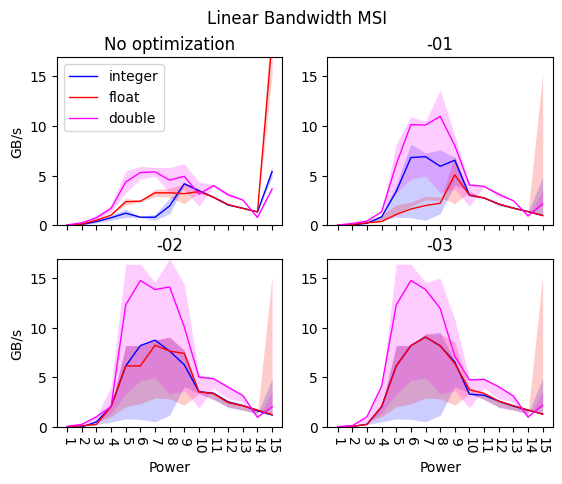

In [6]:
df_MSI=get_dataframe(root_testing_folder+"Homework_runs/")
df_MSI.to_csv("pollo.csv")
df_MSI.replace([np.inf, -np.inf], 0, inplace=True)

# plot
pow_list_MSI,type_list,max_pow, bandwidths_LBM = get_data_values(df_MSI,"bandwidth")

print_plots(pow_list_MSI, type_list, bandwidths_LBM,measuring = "GB/s",title="Linear Bandwidth MSI")


7.281777777777778


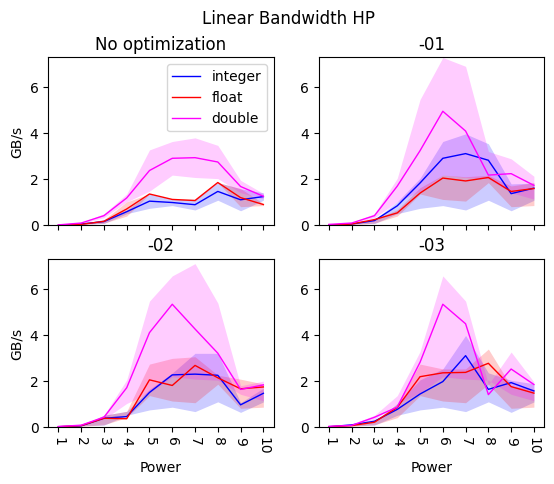

In [7]:
df_HP = get_dataframe(root_testing_folder+"Homework_runs_HP/")
pow_list,type_list,max_pow, bandwidths_LBH = get_data_values(df_HP,"bandwidth")
print_plots(pow_list, type_list, bandwidths_LBH,measuring = "GB/s",title="Linear Bandwidth HP")


/tmp/ipykernel_95807/1820678608.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  return (2**row["pow"]*2**row["pow"])*2*d_dim/(row["seconds"]*10**9)


26.2144


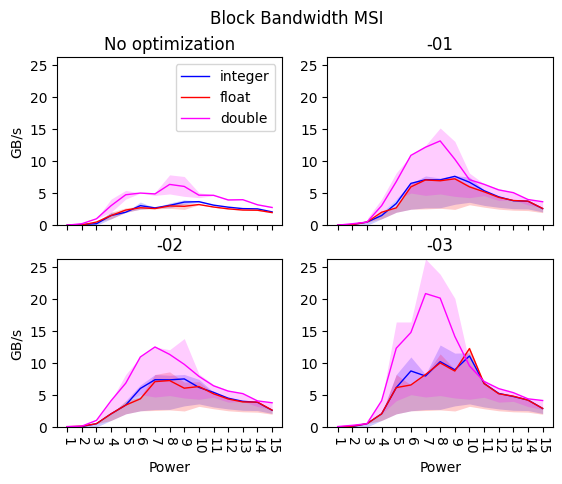

In [8]:
df_MSI_block = get_dataframe(root_testing_folder+"Homework_runs_block/")
df_MSI_block.to_csv("pollo2.csv")
df_MSI_block.replace([np.inf, -np.inf], 0, inplace=True)

pow_list,type_list,max_pow, bandwidths_BBM = get_data_values(df_MSI_block,"bandwidth")
print_plots(pow_list, type_list, bandwidths_BBM,measuring = "GB/s",title="Block Bandwidth MSI")


7.489828571428571


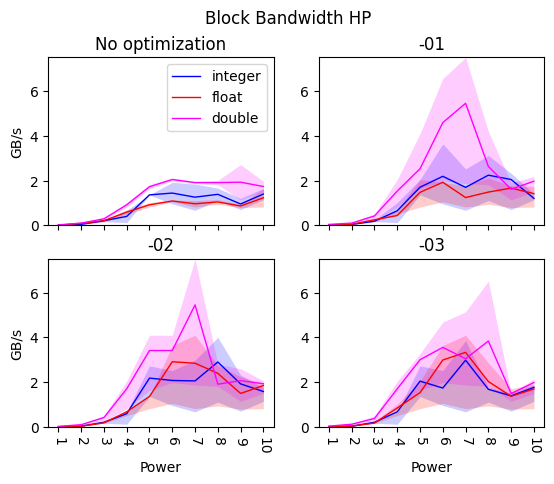

In [9]:
df_HP_block = get_dataframe(root_testing_folder+"Homework_runs_block_HP/")
pow_list_HP,type_list,max_pow, bandwidths_BBH = get_data_values(df_HP_block,"bandwidth")
print_plots(pow_list_HP, type_list, bandwidths_BBH,measuring = "GB/s",title="Block Bandwidth HP")


In [10]:
def file_properties_cache(path):
    list_of_matches = re.findall("cache_(\d+)-(\d+)-(\d+)-(\d+).txt", path)
    arr = list_of_matches.pop()
    return int(arr[0]),int(arr[1]),int(arr[2]),int(arr[3])

def file_properties_cache_HP(path):
    list_of_matches = re.findall("cache_(\d+)_(\d+)_(\d+)_(\d+).txt", path)
    arr = list_of_matches.pop()
    return int(arr[0]),int(arr[1]),int(arr[2]),int(arr[3])

def file_reader_D1_rates(str):
    list_of_matches = re.findall("D1 +miss rate: +(\d+\.\d+)% \( +(\d+\.\d+)% +\+ +(\d+\.\d+)% +\)", str)
    arr = list_of_matches.pop()
    return float(arr[0]),float(arr[1]),float(arr[2])

def file_reader_LLd_rates(str):
    list_of_matches = re.findall("LLd +miss rate: +(\d+\.\d+)% \( +(\d+\.\d+)% +\+ +(\d+\.\d+)% +\)", str)
    arr = list_of_matches.pop()
    return float(arr[0]),float(arr[1]),float(arr[2])

In [11]:
def get_dataframe_cache(data_path):
    paths = file_paths(data_path)
    properties_list = []
    for path in paths:
        with open(path) as file:
            pow,iter,dtype,optimization = file_properties_cache(path)
            str = file.read()
            D1_tot,D1_rd,D1_wr = file_reader_D1_rates(str)
            LLd_tot,LLd_rd,LLd_wr = file_reader_LLd_rates(str)

            properties_list.append([pow,iter,dtype,optimization,D1_tot,D1_rd,D1_wr,LLd_tot,LLd_rd,LLd_wr])
    df = pd.DataFrame(properties_list,columns=["pow","iteration","dtype","optimization","D1_tot","D1_rd","D1_wr","LLd_tot","LLd_rd","LLd_wr"])

    return df

In [12]:
def get_dataframe_cache_HP(data_path):
    paths = file_paths(data_path)
    properties_list = []
    for path in paths:
        with open(path) as file:
            pow,iter,dtype,optimization = file_properties_cache_HP(path)
            str = file.read()
            D1_tot,D1_rd,D1_wr = file_reader_D1_rates(str)
            LLd_tot,LLd_rd,LLd_wr = file_reader_LLd_rates(str)

            properties_list.append([pow,iter,dtype,optimization,D1_tot,D1_rd,D1_wr,LLd_tot,LLd_rd,LLd_wr])
    df = pd.DataFrame(properties_list,columns=["pow","iteration","dtype","optimization","D1_tot","D1_rd","D1_wr","LLd_tot","LLd_rd","LLd_wr"])

    return df

5.1


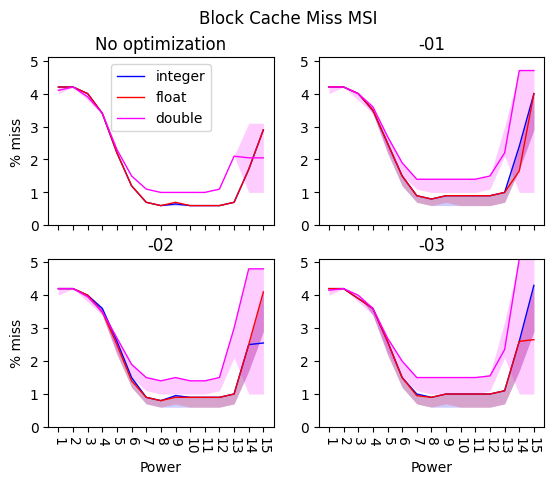

In [13]:
df_MSI_cache_block = get_dataframe_cache(root_testing_folder+"cache_runs_block/")
pow_list,type_list,max_pow, percentage_BC1M = get_data_values(df_MSI_cache_block,"D1_tot")
print_plots(pow_list, type_list, percentage_BC1M,measuring = "% miss",title="Block Cache Miss MSI")

3.5


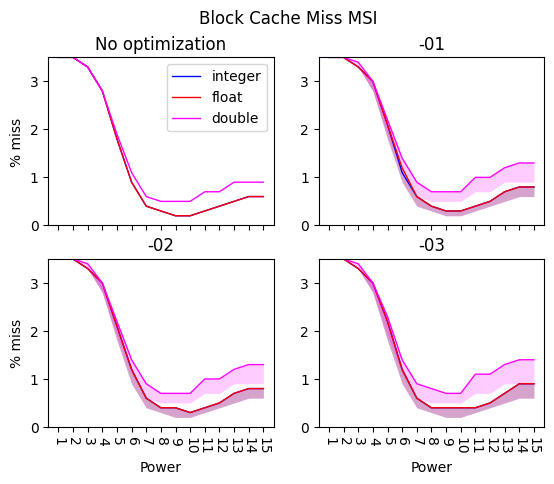

In [14]:
pow_list,type_list,max_pow, percentage_BCLM = get_data_values(df_MSI_cache_block,"LLd_tot")
print_plots(pow_list, type_list, percentage_BCLM,measuring = "% miss",title="Block Cache Miss MSI")

4.2


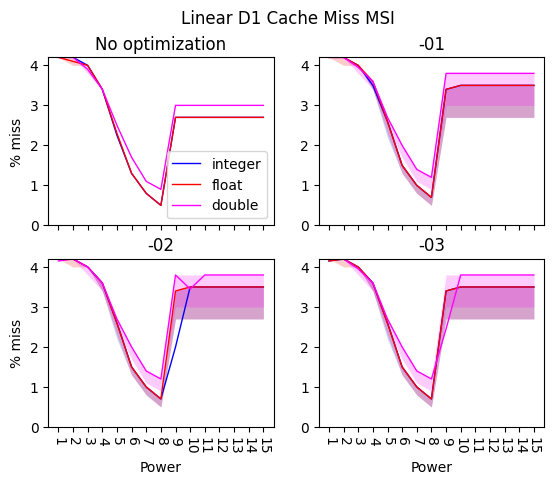

In [15]:
df_MSI_cache = get_dataframe_cache(root_testing_folder+"cache_runs/")
pow_list,type_list,max_pow, percentage_LC1M = get_data_values(df_MSI_cache,"D1_tot")
print_plots(pow_list, type_list, percentage_LC1M,measuring = "% miss",title="Linear D1 Cache Miss MSI")

3.5


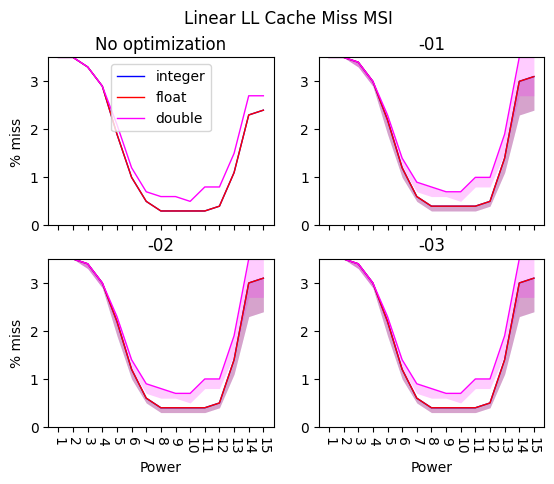

In [16]:
pow_list,type_list,max_pow, percentage_LCLM = get_data_values(df_MSI_cache,"LLd_tot")
print_plots(pow_list, type_list, percentage_LCLM,measuring = "% miss",title="Linear LL Cache Miss MSI")

4.0


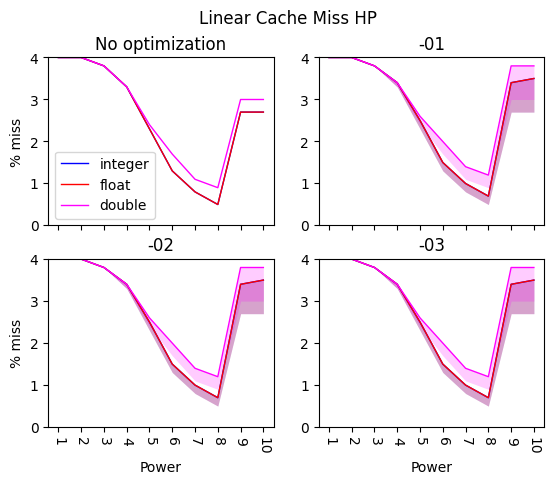

In [17]:
df_HP_cache = get_dataframe_cache_HP(root_testing_folder+"cache_runs_HP/")
pow_list,type_list,max_pow, percentage_LC1H = get_data_values(df_HP_cache,"D1_tot")
print_plots(pow_list, type_list, percentage_LC1H,measuring = "% miss",title="Linear Cache Miss HP")

4.0


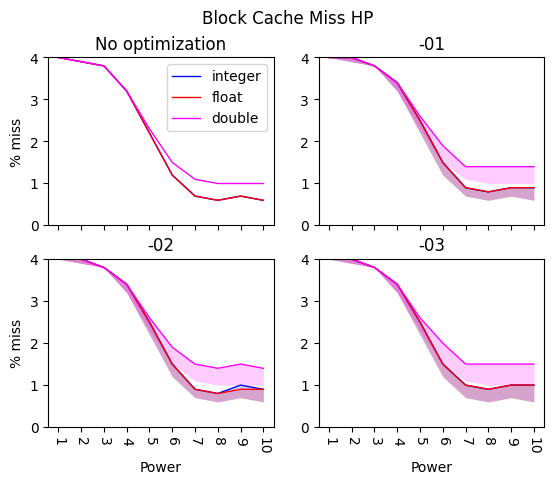

In [18]:
df_HP_cache_block = get_dataframe_cache_HP(root_testing_folder+"cache_runs_block_HP/")
pow_list,type_list,max_pow, percentage_BC1H = get_data_values(df_HP_cache_block,"D1_tot")
print_plots(pow_list, type_list, percentage_BC1H,measuring = "% miss",title="Block Cache Miss HP")

In [19]:
def print_plots(pow_list, list_of_y1,list_of_y2, list_of_labels, alpha=.2,measuring1="",measuring2="",title = "####################"):
    colors = ["blue","red","green","magenta"]
    linestyle = ["solid","dashed","dotted","dashdot"]
    fig, (ax1,ax2) = plt.subplots(2, 1, layout='constrained')
    max_x = max(pow_list)
    max_value = map(max,list_of_y1)
    for x in range(len(list_of_y1)):
        style_index = int(x/4)
        ax1.plot(pow_list,list_of_y1[x],color = colors[x%4],linestyle= linestyle[style_index])
    
    print(list_of_y2)
    for x in range(len(list_of_y2)):
        style_index = int(x/4)
        ax2.plot(pow_list,list_of_y2[x],color = colors[x%4],linestyle= linestyle[style_index],label=list_of_labels[x])


    ax2.legend()
    ax1.set_ylabel(measuring1)
    ax2.set_ylabel(measuring2)

    fig.suptitle(title)
    plt.show()

In [20]:
def get_middle_values(list_of_values,dtype):
    element = []
    for o in range(len(list_of_values)):
        element.append([])
        for x in range(len(list_of_values[o][dtype][2])):
            element[o].append(list_of_values[o][dtype][2][x])

    return element

[[4.2, 4.2, 3.9, 3.4, 2.5, 1.7, 1.1, 0.9, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0], [4.2, 4.2, 3.95, 3.6, 2.7, 2.0, 1.4, 1.2, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8], [4.15, 4.2, 4.0, 3.6, 2.7, 2.0, 1.4, 1.2, 3.8, 3.45, 3.8, 3.8, 3.8, 3.8, 3.8], [4.2, 4.2, 3.95, 3.6, 2.7, 2.0, 1.4, 1.2, 2.45, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8], [4.1, 4.2, 3.9, 3.4, 2.3, 1.5, 1.1, 1.0, 1.0, 1.0, 1.0, 1.1, 2.1, 2.05, 2.05], [4.2, 4.2, 4.0, 3.6, 2.7, 1.9, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 2.2, 4.7, 4.7], [4.2, 4.2, 3.95, 3.5, 2.7, 1.9, 1.5, 1.4, 1.5, 1.4, 1.4, 1.5, 3.0, 4.8, 4.8], [4.15, 4.2, 4.0, 3.6, 2.7, 2.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.55, 2.35, 5.1, 5.1]]


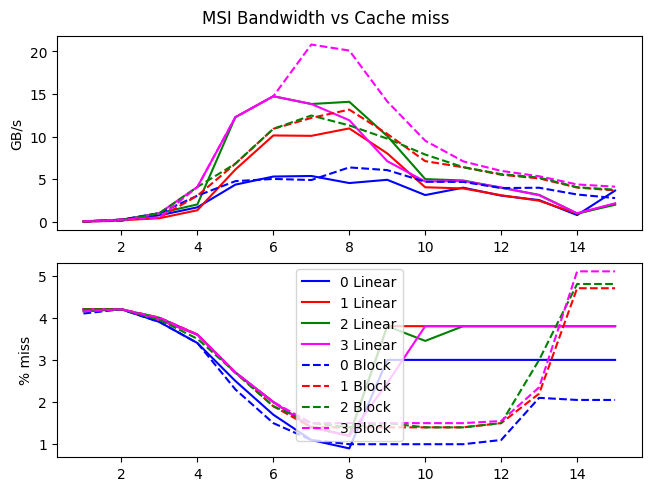

In [21]:
y_list_bandwidths = []
LBM = get_middle_values(bandwidths_LBM,2)
BBM = get_middle_values(bandwidths_BBM,2)

for x in LBM:
    y_list_bandwidths.append(x)
for x in BBM:
    y_list_bandwidths.append(x)

y_list_percentage = []
LC1M = get_middle_values(percentage_LC1M,2)
BC1M = get_middle_values(percentage_BC1M,2)

for x in LC1M:
    y_list_percentage.append(x)
for x in BC1M:
    y_list_percentage.append(x)


labels =["0 Linear","1 Linear", "2 Linear","3 Linear","0 Block","1 Block", "2 Block","3 Block"]
print_plots(pow_list_MSI,y_list_bandwidths, y_list_percentage, labels,measuring1="GB/s",measuring2="% miss",title="MSI Bandwidth vs Cache miss")

[[4.0, 4.0, 3.8, 3.3, 2.4, 1.7, 1.1, 0.9, 3.0, 3.0], [4.0, 4.0, 3.8, 3.4, 2.6, 2.0, 1.4, 1.2, 3.8, 3.8], [4.0, 4.0, 3.8, 3.4, 2.6, 2.0, 1.4, 1.2, 3.8, 3.8], [4.0, 4.0, 3.8, 3.4, 2.6, 2.0, 1.4, 1.2, 3.8, 3.8], [4.0, 3.9, 3.8, 3.2, 2.3, 1.5, 1.1, 1.0, 1.0, 1.0], [4.0, 4.0, 3.8, 3.4, 2.6, 1.9, 1.4, 1.4, 1.4, 1.4], [4.0, 4.0, 3.8, 3.4, 2.6, 1.9, 1.5, 1.4, 1.5, 1.4], [4.0, 4.0, 3.8, 3.4, 2.6, 2.0, 1.5, 1.5, 1.5, 1.5]]


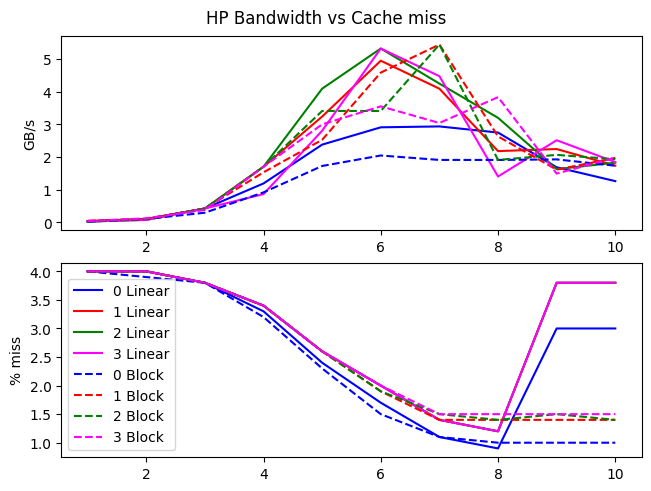

In [22]:
y_list_bandwidths = []
LBH = get_middle_values(bandwidths_LBH,2)
BBH = get_middle_values(bandwidths_BBH,2)

for x in LBH:
    y_list_bandwidths.append(x)
for x in BBH:
    y_list_bandwidths.append(x)

y_list_percentage = []
LC1H = get_middle_values(percentage_LC1H,2)
BC1H = get_middle_values(percentage_BC1H,2)

for x in LC1H:
    y_list_percentage.append(x)
for x in BC1H:
    y_list_percentage.append(x)


labels =["0 Linear","1 Linear", "2 Linear","3 Linear","0 Block","1 Block", "2 Block","3 Block"]
print_plots(pow_list_HP,y_list_bandwidths, y_list_percentage, labels,measuring1="GB/s",measuring2="% miss",title="HP Bandwidth vs Cache miss")

[[3.5, 3.5, 3.3, 2.9, 2.1, 1.2, 0.7, 0.6, 0.6, 0.5, 0.8, 0.8, 1.5, 2.7, 2.7], [3.5, 3.5, 3.4, 3.0, 2.3, 1.4, 0.9, 0.8, 0.7, 0.7, 1.0, 1.0, 1.9, 3.5, 3.5], [3.5, 3.5, 3.4, 3.0, 2.3, 1.4, 0.9, 0.8, 0.7, 0.7, 1.0, 1.0, 1.9, 3.5, 3.5], [3.5, 3.5, 3.4, 3.0, 2.3, 1.4, 0.9, 0.8, 0.7, 0.7, 1.0, 1.0, 1.9, 3.5, 3.5], [3.5, 3.5, 3.3, 2.8, 1.9, 1.1, 0.6, 0.5, 0.5, 0.5, 0.7, 0.7, 0.9, 0.9, 0.9], [3.5, 3.5, 3.4, 3.0, 2.2, 1.4, 0.9, 0.7, 0.7, 0.7, 1.0, 1.0, 1.2, 1.3, 1.3], [3.5, 3.5, 3.4, 3.0, 2.2, 1.4, 0.9, 0.7, 0.7, 0.7, 1.0, 1.0, 1.2, 1.3, 1.3], [3.5, 3.5, 3.4, 3.0, 2.3, 1.4, 0.9, 0.8, 0.7, 0.7, 1.1, 1.1, 1.3, 1.4, 1.4]]


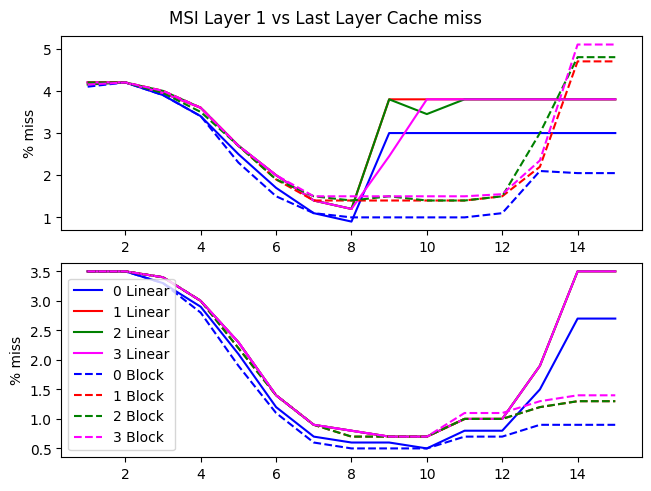

In [23]:
y_list_bandwidths = []
a = get_middle_values(percentage_LC1M,2)
b = get_middle_values(percentage_BC1M,2)

for x in a:
    y_list_bandwidths.append(x)
for x in b:
    y_list_bandwidths.append(x)

y_list_percentage = []
c = get_middle_values(percentage_LCLM,2)
d = get_middle_values(percentage_BCLM,2)

for x in c:
    y_list_percentage.append(x)
for x in d:
    y_list_percentage.append(x)


labels =["0 Linear","1 Linear", "2 Linear","3 Linear","0 Block","1 Block", "2 Block","3 Block"]
print_plots(pow_list_MSI,y_list_bandwidths, y_list_percentage, labels,measuring1="% miss",measuring2="% miss",title="MSI Layer 1 vs Last Layer Cache miss")

[[0.013333333333333332, 0.048, 0.1792, 0.7168, 1.3653333333333333, 1.1299310344827587, 1.0839059595407328, 1.8624854496352943, 1.2076766682064606, 0.9089222671142725], [0.016, 0.064, 0.256, 0.5461333333333334, 1.4043428571428573, 2.0560313725490196, 1.9308455913978495, 2.080704136803722, 1.4753086471166639, 1.6015107307457817], [0.016, 0.064, 0.384, 0.3618133333333333, 2.048, 1.8045314685314684, 2.673847409220726, 2.137220541203374, 1.6593883722021492, 1.7396252870602549], [0.016, 0.064, 0.21333333333333332, 0.8533333333333333, 2.1845333333333334, 2.3525743589743593, 2.3710873533246417, 2.765612268640931, 1.7551798149498294, 1.472152114185557], [0.013333333333333332, 0.096, 0.21333333333333332, 0.5973333333333333, 0.9216, 1.0934816462736374, 0.9675659311374054, 1.0497412231614875, 0.8705668146582763, 1.235320439435065], [0.016, 0.05333333333333333, 0.256, 0.4437333333333333, 1.479111111111111, 1.927529411764706, 1.2457095337095336, 1.4896131161503248, 1.6675020060888324, 1.421055104879

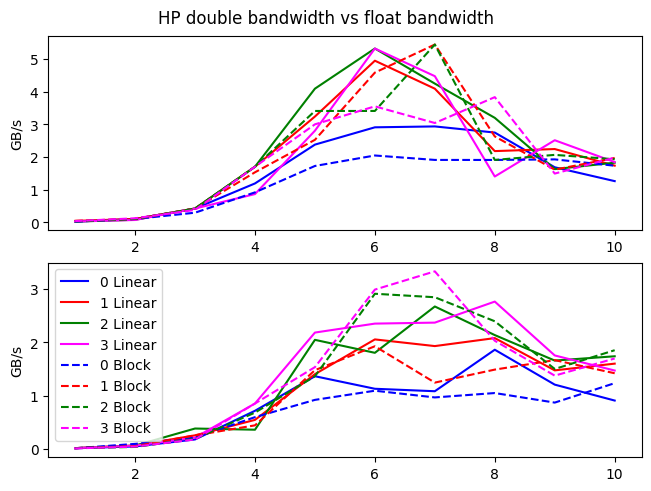

In [24]:
y_list_bandwidths = []
a = get_middle_values(bandwidths_LBH,2)
b = get_middle_values(bandwidths_BBH,2)

for x in a:
    y_list_bandwidths.append(x)
for x in b:
    y_list_bandwidths.append(x)

y_list_bandwidths2 = []
a = get_middle_values(bandwidths_LBH,1)
b = get_middle_values(bandwidths_BBH,1)

for x in a:
    y_list_bandwidths2.append(x)
for x in b:
    y_list_bandwidths2.append(x)



labels =["0 Linear","1 Linear", "2 Linear","3 Linear","0 Block","1 Block", "2 Block","3 Block"]
print_plots(pow_list_HP,y_list_bandwidths, y_list_bandwidths2, labels,measuring1="GB/s",measuring2="GB/s",title="HP double bandwidth vs float bandwidth")